## Building Regression Models

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
32246,2020-05-24,1869,Spanish Primera Division,Villarreal,Eibar,73.84,73.46,0.4872,0.2588,0.2540,1.64,1.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32247,2020-05-24,1871,Spanish Segunda Division,Las Palmas,Extremadura UD,36.80,31.54,0.4904,0.2091,0.3004,1.38,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32248,2020-05-24,1871,Spanish Segunda Division,Numancia,Tenerife,29.52,30.98,0.4367,0.2657,0.2977,1.36,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32249,2020-05-24,1871,Spanish Segunda Division,Elche,Real Oviedo,32.18,30.04,0.4768,0.2473,0.2759,1.56,1.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32250,2020-05-24,1871,Spanish Segunda Division,Real Zaragoza,SD Ponferradina,37.74,29.92,0.5405,0.2037,0.2558,1.76,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


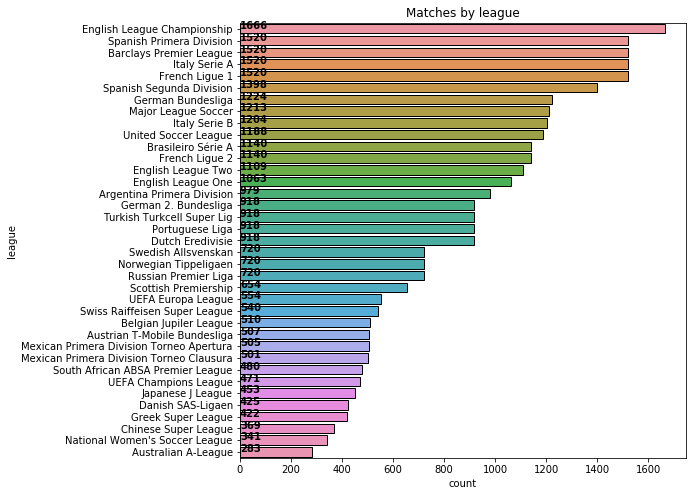

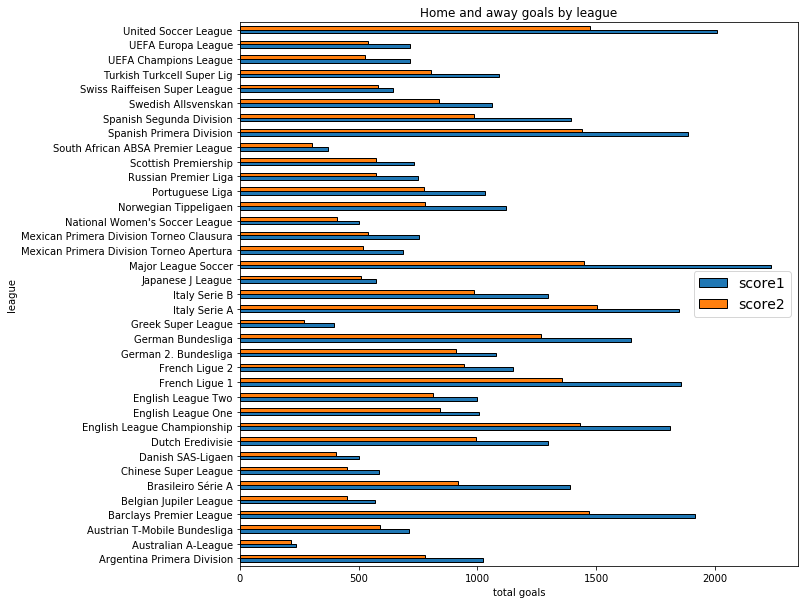

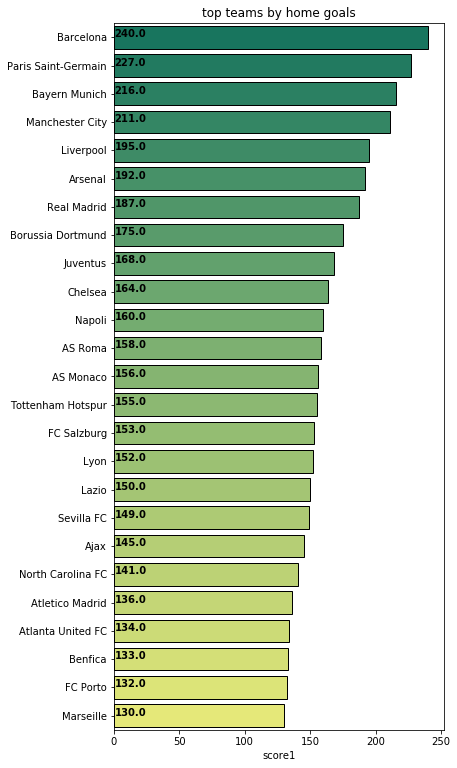

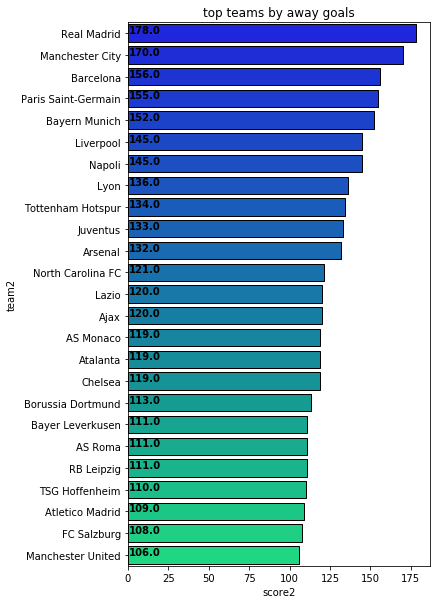

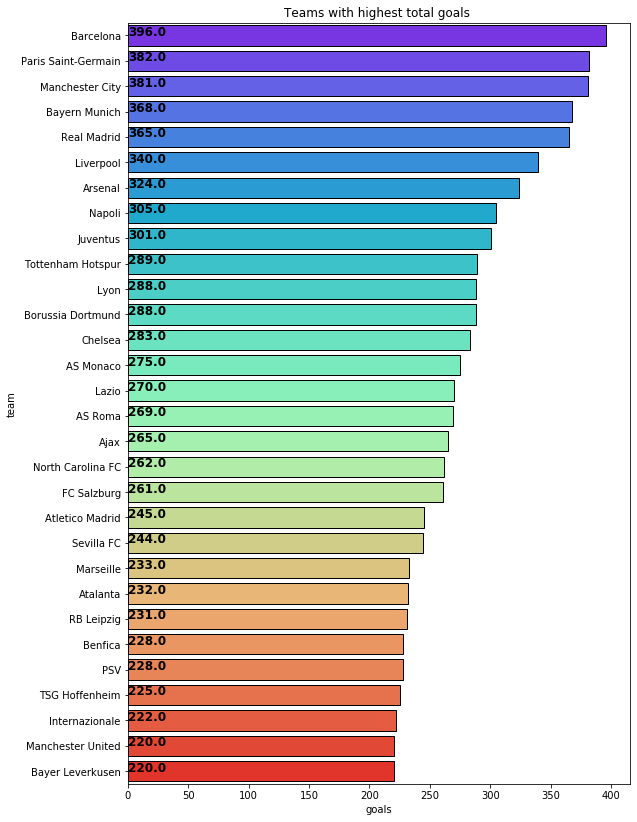

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


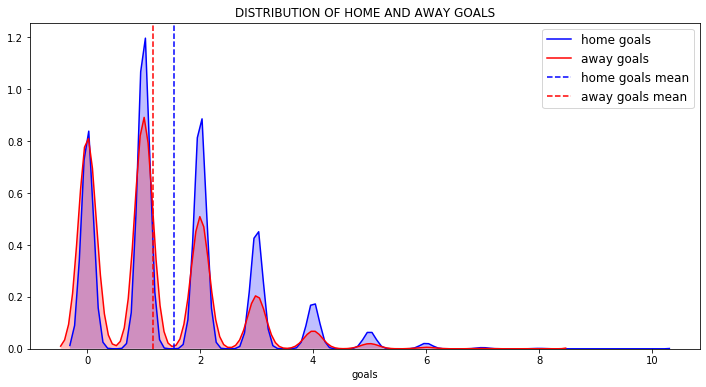

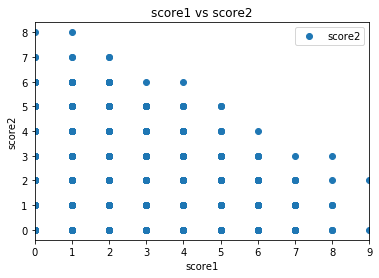

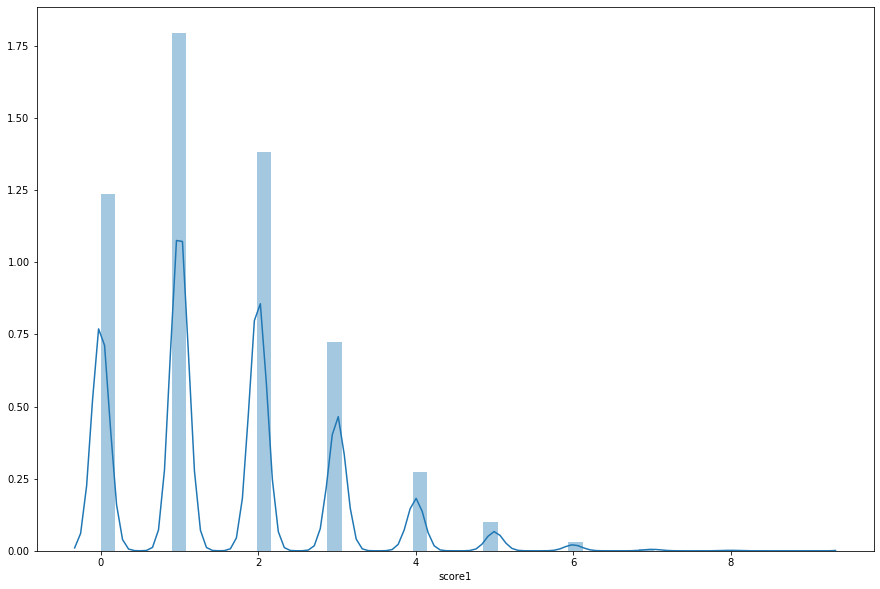

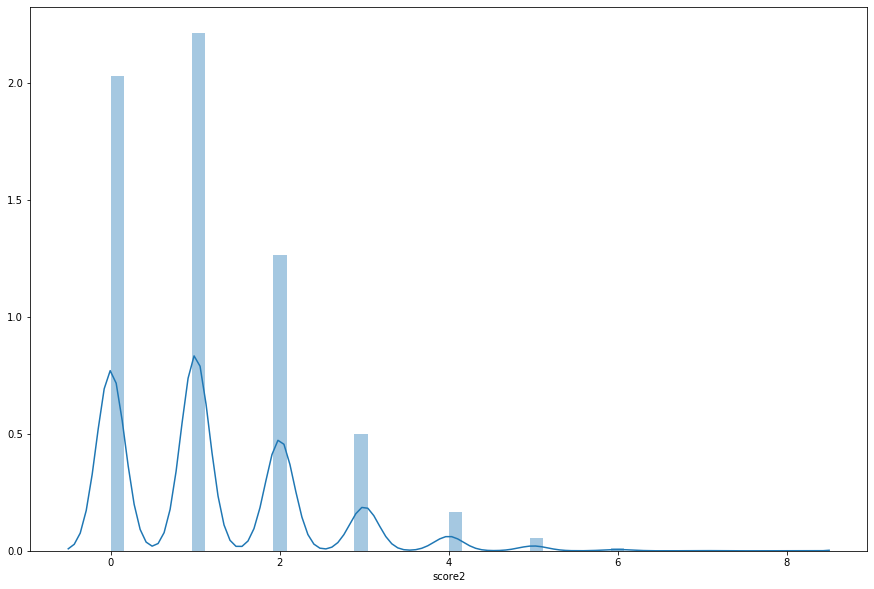

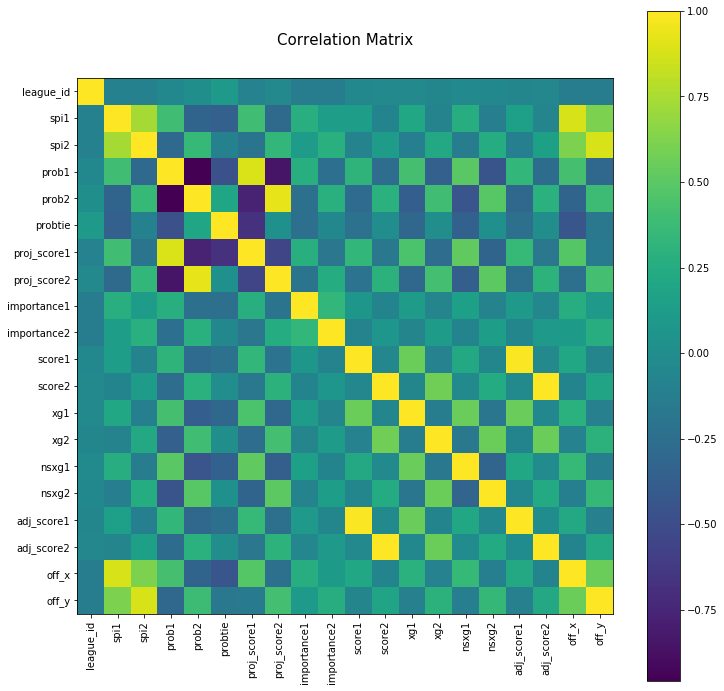

In [1]:
%run data_exploration.ipynb ;

### Building the linear regression model for score1

In [2]:
X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']].values
y1 = spi_matches2['score1'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)

In [4]:
regressor = LinearRegression()  
mod = regressor.fit(X_train, y_train)

In [5]:
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df

In [6]:
y_pred = regressor.predict(X_test)

In [7]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(100)
df1.head()

,Actual,Predicted
0,0.0,0.974814
1,2.0,1.695028
2,1.0,1.214185
3,1.0,1.764012
4,0.0,2.019510


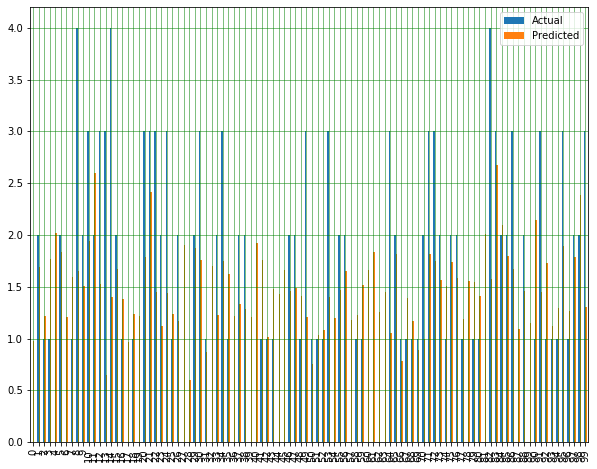

In [8]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.938770905870028
Mean Squared Error: 1.396395594648994
Root Mean Squared Error: 1.1816918357376403


### The metrics used for the regression are as follows:
1. Mean Asbolute error which is the average of all residuals.
2. Mean Squared error which is the squraing the residuals and then taking their average.
3. root mean squared error which is the square root of the Mean squared error.

### Building the linear regression model for score2

In [10]:
X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','off_y']].values
y2 = spi_matches2['score2'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(100)
df1.head()

,Actual,Predicted
0,1.0,1.777130
1,1.0,1.020490
2,0.0,0.954708
3,1.0,0.776290
4,1.0,1.184524


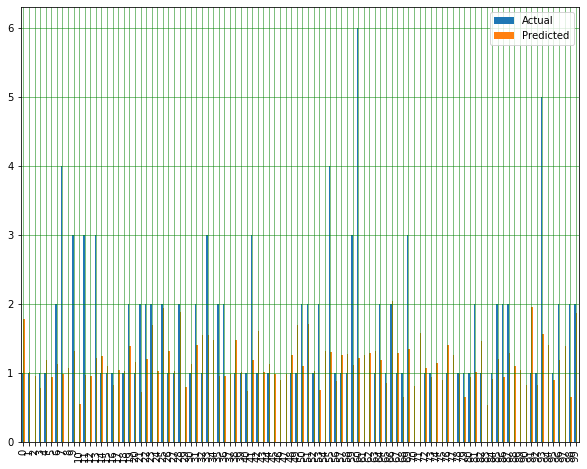

In [15]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [16]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8587917051021944
Mean Squared Error: 1.2138690561699619
Root Mean Squared Error: 1.1017572582787742


## Random Forest Model 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#model = DecisionTreeClassifier()

In [18]:
#X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','xg1','xg2','nsxg1','nsxg2','off_x','off_y']]
X1 = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']]
X2 = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']]
y1 = spi_matches2['score1']
y2 = spi_matches2['score2']
#y1=y1.astype(str)
#y2=y2.astype(str)

In [19]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)
#X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1,random_state=1)

In [20]:
rf = RandomForestRegressor(n_estimators=50)

#### Score1

In [21]:
rf.fit(X1_train, y1_train.values.ravel())


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import confusion_matrix
# Print Random Forest Regression Mean Square Error for Team 1

rfPredictTrainTeam1 = rf.predict(X1_train)
# Calculate the Square errors
rfErrorTrainTeam1 = (rfPredictTrainTeam1 - y1_train)**2
rfTrainTeam1MSE =  round(np.mean(rfErrorTrainTeam1),3)
print('Mean Square Error Train score1:', rfTrainTeam1MSE)



rfPredictTeam1 = rf.predict(X1_test)
rfPredictTeam1 = np.round(rfPredictTeam1)
rfErrorTeam1 = (rfPredictTeam1 - y1_test)**2
rfTestTeam1MSE = round(np.mean(rfErrorTeam1),3)
print('Mean Square Error Test score1:', rfTestTeam1MSE)

cnf_matrix = confusion_matrix(rfPredictTeam1, y1_test)

Mean Square Error Train score1: 0.218
Mean Square Error Test score1: 1.688


In [23]:
cnf_matrix

array([[ 10,   8,   4,   0,   1,   0,   0,   0,   0,   0],
       [648, 795, 489, 208,  58,  17,   3,   0,   0,   0],
       [334, 631, 556, 299, 132,  60,  21,   6,   1,   1],
       [ 25,  49,  66,  55,  35,  20,  12,   4,   2,   0],
       [  1,   5,   2,   3,   2,   1,   2,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

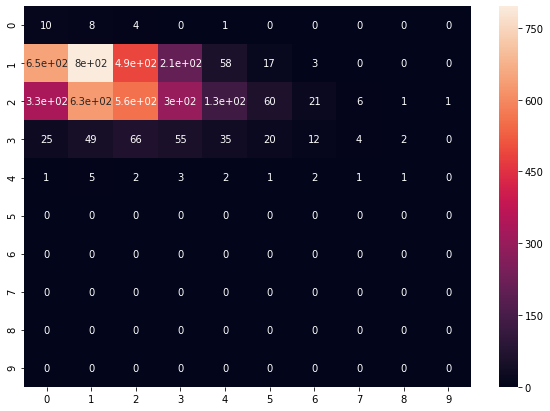

In [24]:
array = cnf_matrix
plt.figure(figsize = (10,7))
sns.heatmap(array, annot=True)

In [25]:
rf.score(X1_train, y1_train)

0.8642627796791943

#### Score2

In [26]:
rf.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:

# Print Random Forest Regression Mean Square Error for Team 1

rfPredictTrainTeam1 = rf.predict(X2_train)
# Calculate the Square errors
rfErrorTrainTeam1 = (rfPredictTrainTeam1 - y2_train)**2
rfTrainTeam1MSE =  round(np.mean(rfErrorTrainTeam1),3)
print('Mean Square Error Train score2:', rfTrainTeam1MSE)



rfPredictTeam1 = rf.predict(X2_test)
rfPredictTeam1 = np.round(rfPredictTeam1)
rfErrorTeam1 = (rfPredictTeam1 - y2_test)**2
rfTestTeam1MSE = round(np.mean(rfErrorTeam1),3)
print('Mean Square Error Test score2:', rfTestTeam1MSE)

cnf_matrix = confusion_matrix(rfPredictTeam1, y2_test)

Mean Square Error Train score2: 0.175
Mean Square Error Test score2: 1.273


In [28]:
cnf_matrix

array([[  73,   29,   18,    4,    0,    0,    0,    0],
       [1221, 1244,  658,  204,   53,   17,    6,    1],
       [ 210,  313,  234,  126,   59,   25,    5,    2],
       [   8,   16,   19,   15,    4,    3,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0]], dtype=int64)

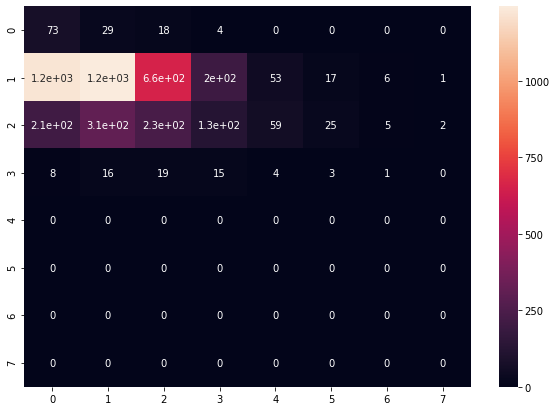

In [29]:
array = cnf_matrix
plt.figure(figsize = (10,7))
sns.heatmap(array, annot=True)

In [30]:
rf.score(X2_train, y2_train)

0.8616376379295124

### Logistic Regression

In [31]:
X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']].values
y1 = spi_matches2['score1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14616, 10) (14616,)
(3654, 10) (3654,)


In [32]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on train set for score1: {:.2f}'.format(logreg1.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set for score1: {:.2f}'.format(logreg1.score(X_test, y_test)))



Accuracy of Logistic regression classifier on train set for score1: 0.33
Accuracy of Logistic regression classifier on test set for score1: 0.32


C:\Users\yousif\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Mean Square Errors

In [34]:

# Print logistic Regression Mean Square Error for Team 1

Logregpredtrain = logreg1.predict(X_train)
# Calculate the Square errors
Logregerrortrain = (Logregpredtrain - y_train)**2
LogregMSEtrain =  round(np.mean(Logregerrortrain),3)
print('Mean Square Error Train score1:', LogregMSEtrain)



Logregpredtest = logreg1.predict(X_test)
Logregerrortest = (Logregpredtest - y_test)**2
LogregMSEtest = round(np.mean(Logregerrortest),3)
print('Mean Square Error Test score1:', LogregMSEtest)

Mean Square Error Train score1: 1.883
Mean Square Error Test score1: 1.837


In [35]:
X = spi_matches2[['spi1', 'spi2', 'prob1', 'prob2', 'importance1', 'importance2','proj_score1','proj_score2','off_x','off_y']].values
y2 = spi_matches2['score2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14616, 10) (14616,)
(3654, 10) (3654,)


In [36]:
from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on train set for score2: {:.2f}'.format(logreg1.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set for score2: {:.2f}'.format(logreg1.score(X_test, y_test)))



Accuracy of Logistic regression classifier on train set for score2: 0.32
Accuracy of Logistic regression classifier on test set for score2: 0.31


C:\Users\yousif\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:

# Print logistic Regression Mean Square Error for Team 2

Logregpredtrain2 = logreg2.predict(X_train)
# Calculate the Square errors
Logregerrortrain2 = (Logregpredtrain2 - y_train)**2
LogregMSEtrain2 =  round(np.mean(Logregerrortrain2),3)
print('Mean Square Error Train score2:', LogregMSEtrain2)



Logregpredtest2 = logreg2.predict(X_test)
Logregerrortest2 = (Logregpredtest2 - y_test)**2
LogregMSEtest2 = round(np.mean(Logregerrortest2),3)
print('Mean Square Error Test score2:', LogregMSEtest2)

Mean Square Error Train score2: 1.434
Mean Square Error Test score2: 1.495


### Conclusion

A linear regression model, random forest and logistic regression models were built. The model predicts the scores of teams competing in a soccer game. 
For each score the Mean Absolute Error, Mean Squared Error and the Root Mean Squared Error was calculated.
Below is the summary for the mean square errors for different models:
#### 1. Linear Regression
* Mean Squared Error for score1: 1.397
* Mean Squared Error for score2: 1.214

#### 2. Random Forest
* Mean Squared Error for score1: 1.617 
* Mean Squared Error for score2: 1.285

#### 3. Logistic Regression
* Mean Squared Error for score1: 1.836
* Mean Squared Error for score2: 1.495


#### The best model was the linear regression model.